# Task 1
## Triangular

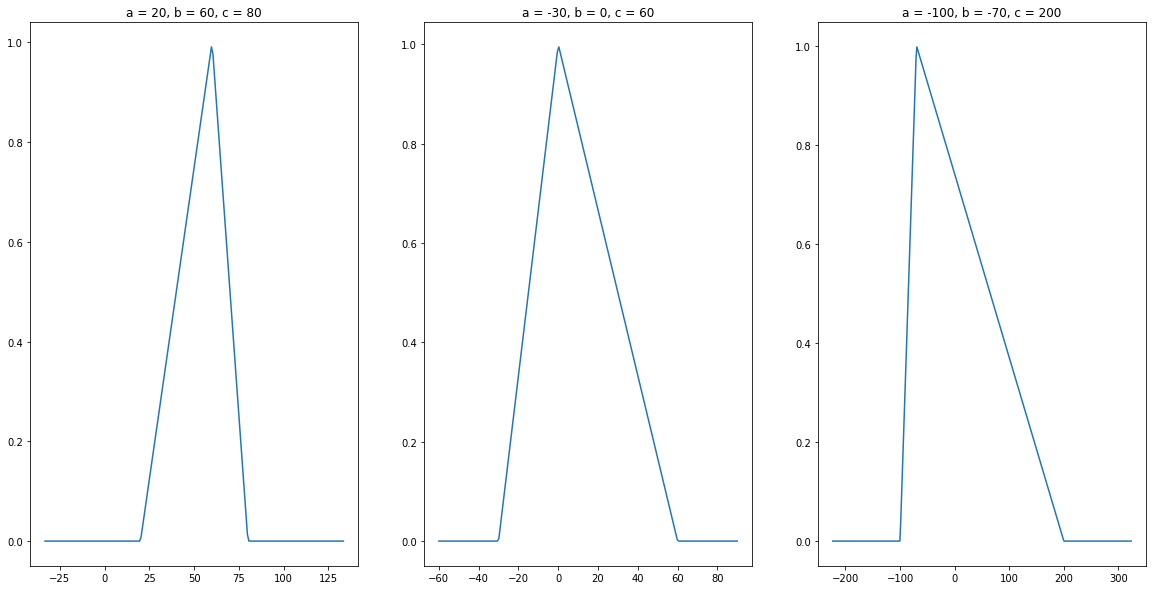

In [5]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


def draw_triangular(params):
    [a, b, c] = params
    params_mean = np.mean(np.abs(params))
    resolution = max(np.sum(np.abs(params)), 200)
    x = np.linspace(a - params_mean,
                    c + params_mean, resolution)
    y = np.piecewise(x, [x < a, a <= x, b <= x, c <= x],
                     [0, lambda x: (x - a) / (b - a), lambda x: (c - x) / (c - b), 0])
    plt.plot(x, y)


triangular_params = [[20, 60, 80], [-30, 0, 60], [-100, -70, 200]]
plt.figure(figsize=(20, 10))
for x in range(len(triangular_params)):
    plt.subplot(1, 3, x + 1)
    plt.title('a = {}, b = {}, c = {}'.format(*triangular_params[x]))
    draw_triangular(triangular_params[x])

plt.show()


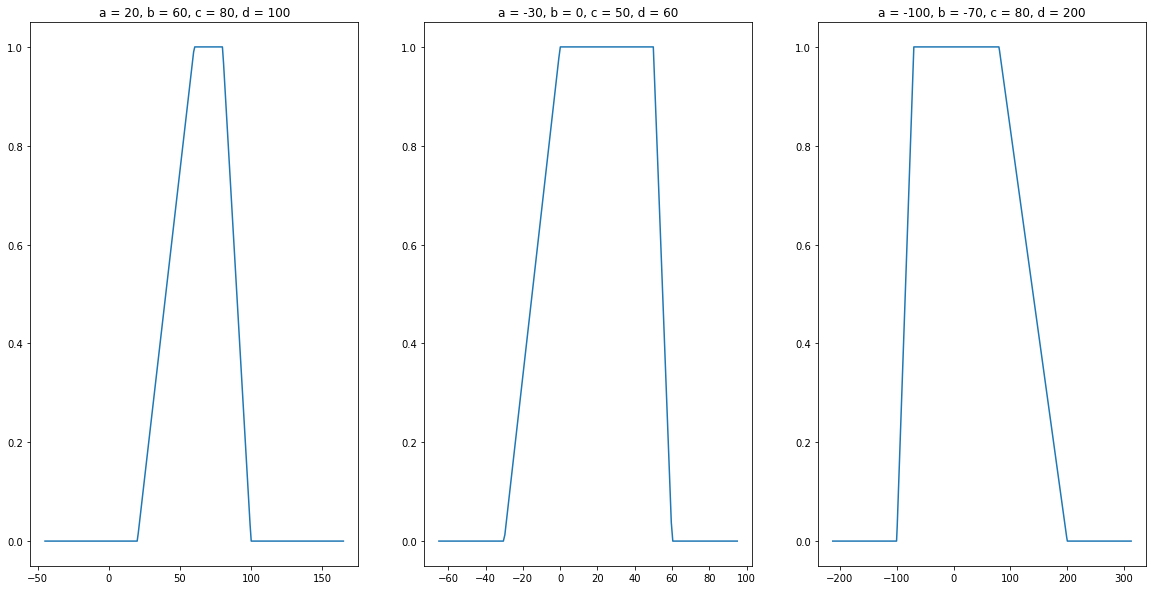

In [37]:
def trapezoid(x, params):
    [a, b, c, d] = params
    return np.piecewise(x, [x < a, a <= x, b <= x, c <= x, d <= x],
                     [0, lambda x: (x - a) / (b - a), 1, lambda x: (d - x) / (d - c), 0])


def draw_trapezoid(params):
    [a, b, c, d] = params
    params_mean = np.mean(np.abs(params))
    resolution = max(np.sum(np.abs(params)), 200)
    x = np.linspace(a - params_mean,
                    d + params_mean, resolution)
    y = trapezoid(x, params)
    plt.plot(x, y)


trapezoid_params = [[20, 60, 80, 100], [-30, 0, 50, 60], [-100, -70, 80, 200]]
plt.figure(figsize=(20, 10))
for x in range(len(trapezoid_params)):
    plt.subplot(1, 3, x + 1)
    plt.title('a = {}, b = {}, c = {}, d = {}'.format(*trapezoid_params[x]))
    draw_trapezoid(trapezoid_params[x])

plt.show()


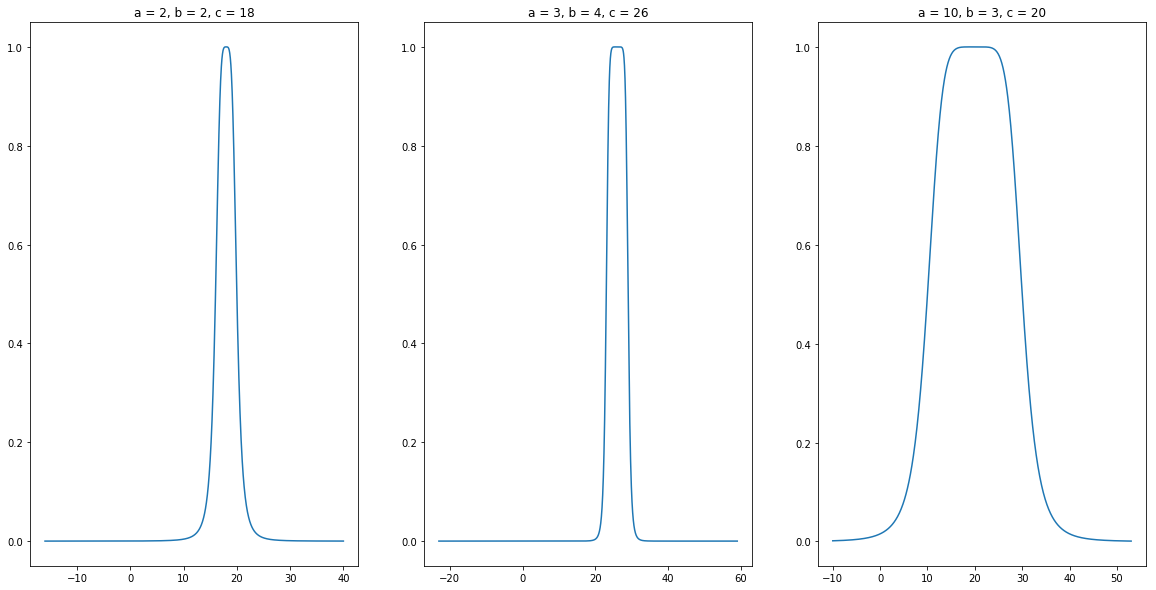

In [20]:
def draw_bell(params):
    [a, b, c] = params
    resolution = (c - a) * 100
    x = np.linspace(a - np.max(params), c + np.sum(params), resolution)
    y = 1 / (1 + np.power((x-c)/a, 2 * b))
    plt.plot(x, y)


bell_params = [[2, 2, 18], [3, 4, 26], [10, 3, 20]]
plt.figure(figsize=(20, 10))
for x in range(len(bell_params)):
    plt.subplot(1, 3, x + 1)
    plt.title('a = {}, b = {}, c = {}'.format(*bell_params[x]))
    draw_bell(bell_params[x])

plt.show()


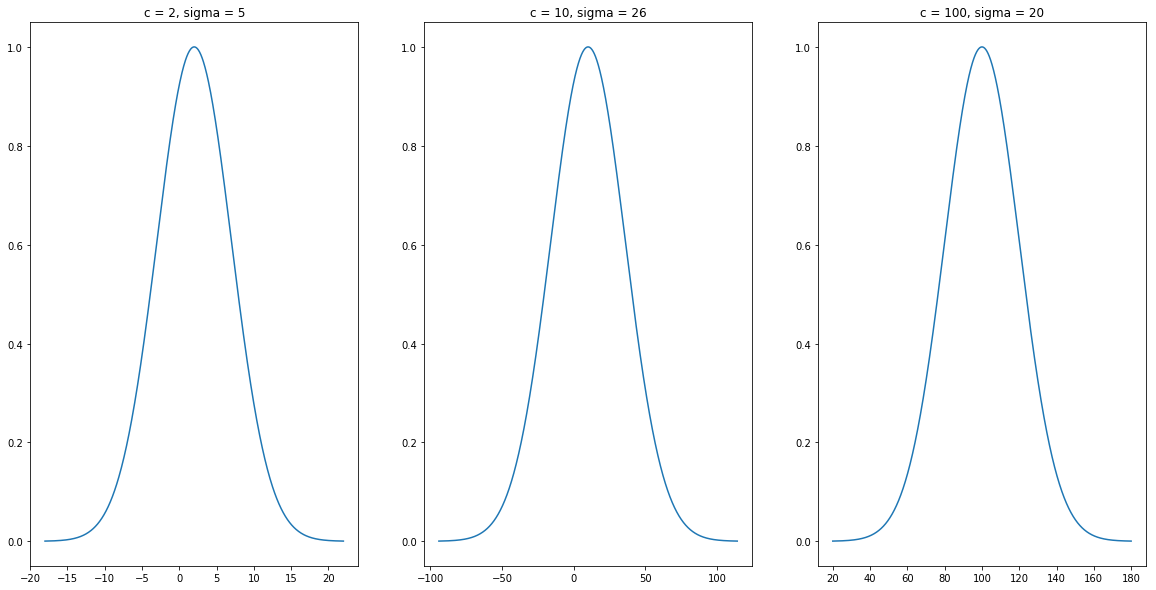

In [22]:
def draw_gaussian(params):
    [c, sigma] = params
    resolution = (c + sigma) * 100
    x = np.linspace(c - sigma * 4, c + sigma * 4, resolution)
    y = np.exp(-0.5 * np.square((x-c)/sigma))
    plt.plot(x, y)


gaussian_params = [[2, 5], [10, 26], [100, 20]]
plt.figure(figsize=(20, 10))
for x in range(len(gaussian_params)):
    plt.subplot(1, 3, x + 1)
    plt.title('c = {}, sigma = {}'.format(*gaussian_params[x]))
    draw_gaussian(gaussian_params[x])

plt.show()


# Task 2

In [36]:
def max_fuzzy_set(x, fuzzy_set):
    y = trapezoid(x, fuzzy_set)
    max_y = np.max(y)
    return x[np.where(y == max_y)]


def smallest_of_max(x, fuzzy_set):
    x_star = max_fuzzy_set(x, fuzzy_set)
    return np.min(x_star)


def largest_of_max(x, fuzzy_set):
    x_star = max_fuzzy_set(x, fuzzy_set)
    return np.max(x_star)


def coa(x, fuzzy_set):
    y = trapezoid(x, fuzzy_set)
    return np.sum(x * y) / np.sum(y)


def mom(x, fuzzy_set):
    x_star = max_fuzzy_set(x, fuzzy_set)
    return np.sum(x_star)/len(x_star)
    
    
x = np.linspace(0, 100, 10000)
trapezoid_set = [10, 30, 50, 90]
print('Smallest of max = {}'.format(smallest_of_max(x, trapezoid_set)))
print('Largest of max = {}'.format(largest_of_max(x, trapezoid_set)))
print('COA = {}'.format(coa(x, trapezoid_set)))
print('MOM = {}'.format(mom(x, trapezoid_set)))


Smallest of max = 30.003000300030003
Largest of max = 49.99499949995
COA = 46.00000008002401
MOM = 39.998999899990004


# Task 3

# Task 3

In [54]:
def min_implication(min, y):
    y[y > min] = min
    return y


def aggregate(Y):
    return np.max(Y, axis=0)


def zcoa(x, y):
    return np.sum(x * y) / np.sum(y)


def mamdani(x, inputs, outputs, rules):
    lin_y_min, lin_y_max = np.min(outputs), np.max(outputs)
    lin_y = np.linspace(lin_y_min, lin_y_max, (lin_y_max - lin_y_min) * 100)
    Y = []
    for i in range(len(inputs)):
        input_set = inputs[i]
        output_set = outputs[rules[i]]
        calculated_input = trapezoid(x, input_set)
        y = trapezoid(lin_y, output_set)
        Y.append(min_implication(calculated_input, y))
        # print('Input set {}, x = {}, calculated input = {}'.format(input_set, x, calculated_input))
    aggregated_Y = aggregate(np.array(Y))
    return zcoa(lin_y, aggregated_Y)


inputs = [[-20, -15, -6, -3], [-6, -3, 3, 6], [3, 6, 15, 20]]
outputs = [[-2.46, -1.46, 1.46, 2.46], [1.46, 2.46, 5, 7], [5, 7, 13, 15]]
rules = [0, 1, 2]
X = [-8., -5., 0., 5., 8.]

for i in range(len(X)):
    out = mamdani(X[i], inputs, outputs, rules)
    print('x = {},\t output = {}'.format(X[i], out))


x = -8.0,	 output = 4.120554138978402e-06
x = -5.0,	 output = 1.522252183401286
x = 0.0,	 output = 4.010942078680871
x = 5.0,	 output = 8.852007356074447
x = 8.0,	 output = 9.999997548697458


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
